In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/plotting.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/comprehensive_df.csv', index_col=0)

In [3]:
df.columns

Index([u'classI', u'classII', u'Tissue', u'Age', u'Race', u'homozygous_classI',
       u'homozygous_classII', u'homozygous_total', u'passenger_coverageI',
       u'passenger_coverageII', u'classI_cat', u'classII_cat', u'classI_het',
       u'classII_het', u'B cells naive', u'B cells memory', u'Plasma cells',
       u'T cells CD8', u'T cells CD4 naive', u'T cells CD4 memory resting',
       u'T cells CD4 memory activated', u'T cells follicular helper',
       u'T cells regulatory (Tregs)', u'T cells gamma delta',
       u'NK cells resting', u'NK cells activated', u'Monocytes',
       u'Macrophages M0', u'Macrophages M1', u'Macrophages M2',
       u'Dendritic cells resting', u'Dendritic cells activated',
       u'Mast cells resting', u'Mast cells activated', u'Eosinophils',
       u'Neutrophils', u'P-value', u'Pearson Correlation', u'RMSE', u'GZMA',
       u'PRF1', u'Cytolytic', u'CD4/CD8 Ratio'],
      dtype='object')

In [4]:
df['MHC-II Expressing Cells'] = df['B cells naive'] + df['B cells memory'] + df['Macrophages M0'] + \
                                df['Macrophages M1'] + df['Macrophages M2'] + df['Dendritic cells resting'] + \
                                df['Dendritic cells activated']

In [5]:
df['MHC-II Expressing Cells'].describe()

count    4649.000000
mean        0.480488
std         0.140863
min         0.030834
25%         0.385513
50%         0.479378
75%         0.575636
max         0.943867
Name: MHC-II Expressing Cells, dtype: float64

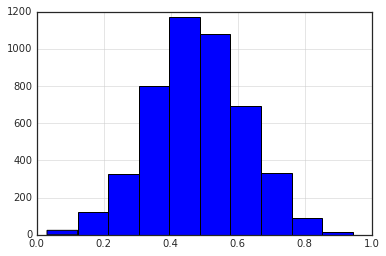

In [6]:
df['MHC-II Expressing Cells'].hist()

In [7]:
subset = 'conservative'

In [8]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.{0}.mut.csv'.format(subset),
                              index_col=0)
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.{0}.mut.ClassI.csv'.format(subset),
                              index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.{0}.mut.ClassII.csv'.format(subset),
                              index_col=0)

In [9]:
# by pan-median
low_exp_patients = [x for x in list(df[df['MHC-II Expressing Cells'] < df['MHC-II Expressing Cells'].quantile(.3)].index) if x in list(patient_affinitiesI.index)]
high_exp_patients = [x for x in list(df[df['MHC-II Expressing Cells'] > df['MHC-II Expressing Cells'].quantile(.7)].index) if x in list(patient_affinitiesI.index)]
print len(low_exp_patients), len(high_exp_patients)

1395 1395


In [10]:
patient_mutations.ix[low_exp_patients, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.low_apc_expr.TCGA.{0}.mut.csv'.format(subset))
patient_affinitiesI.ix[low_exp_patients, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.low_apc_expr.TCGA.{0}.mut.ClassI.csv'.format(subset))
patient_affinitiesII.ix[low_exp_patients, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.low_apc_expr.TCGA.{0}.mut.ClassII.csv'.format(subset))
patient_mutations.ix[high_exp_patients, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.high_apc_expr.TCGA.{0}.mut.csv'.format(subset))
patient_affinitiesI.ix[high_exp_patients, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.high_apc_expr.TCGA.{0}.mut.ClassI.csv'.format(subset))
patient_affinitiesII.ix[high_exp_patients, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.high_apc_expr.TCGA.{0}.mut.ClassII.csv'.format(subset))

In [11]:
# by tissue-specific medians
subset = 'conservative'
patient_tissues = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_tissues.{0}.csv'.format(subset),
                              index_col=0)
low_exp_patients_by_tissue, high_exp_patients_by_tissue = [], []
for tissue in patient_tissues.Tissue.unique():
    tissue_patients = list(patient_tissues[patient_tissues.Tissue == tissue].index)
    tissue_df = df.ix[tissue_patients].dropna()
    if len(tissue_df) > 4:
        low_exp_patients_by_tissue.extend(list(tissue_df[tissue_df['MHC-II Expressing Cells'] < tissue_df['MHC-II Expressing Cells'].quantile(.3)].index))
        high_exp_patients_by_tissue.extend(list(tissue_df[tissue_df['MHC-II Expressing Cells'] > tissue_df['MHC-II Expressing Cells'].quantile(.7)].index))
print len(low_exp_patients_by_tissue), len(high_exp_patients_by_tissue)

1081 1082


In [12]:
patient_mutations.ix[low_exp_patients_by_tissue, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.low_apc_expr_by_tissue.TCGA.{0}.mut.csv'.format(subset))
patient_affinitiesI.ix[low_exp_patients_by_tissue, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.low_apc_expr_by_tissue.TCGA.{0}.mut.ClassI.csv'.format(subset))
patient_affinitiesII.ix[low_exp_patients_by_tissue, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.low_apc_expr_by_tissue.TCGA.{0}.mut.ClassII.csv'.format(subset))
patient_mutations.ix[high_exp_patients_by_tissue, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.high_apc_expr_by_tissue.TCGA.{0}.mut.csv'.format(subset))
patient_affinitiesI.ix[high_exp_patients_by_tissue, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.high_apc_expr_by_tissue.TCGA.{0}.mut.ClassI.csv'.format(subset))
patient_affinitiesII.ix[high_exp_patients_by_tissue, :].to_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.high_apc_expr_by_tissue.TCGA.{0}.mut.ClassII.csv'.format(subset))

###Difference in patient selection

In [18]:
def plot_pan_comparison_by_subject(pan, cat, outfile):
    cat_name1, cat_name2 = pan[cat].unique()    
    pan['Error'] = pan['OR'] - pan['conf_OR_low']
    #plt.axvline(1, color='lightgrey')
    plt.figure(figsize=(3.5, 2.5))
    plt.errorbar(pan[pan[cat] == cat_name1].OR, [x + 0.1 for x in range(len(pan[pan[cat] == cat_name1]))[::-1]], 
                 xerr=list(pan[pan[cat] == cat_name1].Error), fmt='o', 
                 color='k', label='MHC-I')
    plt.errorbar(pan[pan[cat] == cat_name2].OR, [x - 0.1 for x in range(len(pan[pan[cat] == cat_name2]))[::-1]], 
                 xerr=list(pan[pan[cat] == cat_name2].Error), fmt='o', 
                 color='grey', label='MHC-II')
    plt.yticks([1, 0], list(pan[pan[cat] == cat_name2].Condition))
    plt.ylabel('')
    plt.xlabel('Odds ratio')
    plt.ylim(-0.5, 1.5)
    plt.legend(loc=7)
    if outfile != None:
        plt.savefig(outfile, bbox_inches='tight')
    return plt

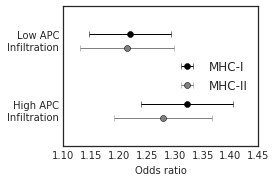

In [19]:
# by tissue
subset = 'conservative'
classes = ['class_i', 'class_ii']
all_dfs = []
for c in classes:
    for f, name in zip(['low_apc_expr_by_tissue.{0}.thresh_2.txt'.format(subset),
                        'high_apc_expr_by_tissue.{0}.thresh_2.txt'.format(subset)],
                       ['Low APC\nInfiltration', 'High APC\nInfiltration']): 
        tmp = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/{0}/{1}'.format(c, f),
               sep=' ')
        tmp['Class'] = c
        tmp['Condition'] = name
        all_dfs.append(tmp)
pan = pd.concat(all_dfs)
plot = plot_pan_comparison_by_subject(pan, 'Class', 
                           '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/APC_infiltration_by_tissue.pan_OR.pdf')

In [20]:
df1 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/low_apc_expr.conservative.thresh_2.txt',
           sep=',')
df2 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/high_apc_expr.conservative.thresh_2.txt',
           sep=',')

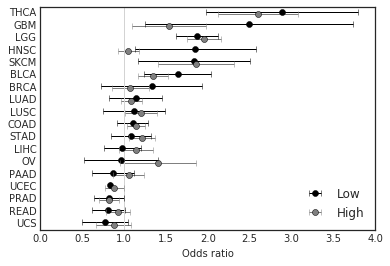

In [75]:
ax = plot_tissue_comparison(df1, df2, 'Low', 'High',
                            '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/apc_expr.classII_OR.pdf')

In [9]:
# get the number of patients with each tissue

In [76]:
high = pd.DataFrame(patient_tissues.ix[high_exp_patients].Tissue.value_counts())
high.columns = ['High APC Infil']
low = pd.DataFrame(patient_tissues.ix[low_exp_patients].Tissue.value_counts())
low.columns = ['Low APC Infil']
infil_per_tissue = pd.merge(high, low, left_index=True, right_index=True)
infil_per_tissue.head()

,High APC Infil,Low APC Infil
PRAD,11,214
LGG,58,213
LIHC,44,114
KIRC,14,103
THCA,101,100


###Distribution of coverage

In [106]:
plotting = pd.DataFrame({'Presentation Coverage of\nMHC-II Driver Space': list(df.loc[low_exp_patients_by_tissue].classII) + list(df.loc[high_exp_patients_by_tissue].classII),
                         'APC Infiltration': ['Low' for x in list(df.loc[low_exp_patients_by_tissue].index)] + ['High' for x in list(df.loc[high_exp_patients_by_tissue].index)]})


In [107]:
statistic, p = sp.mannwhitneyu(df.loc[low_exp_patients_by_tissue].classII,
                df.loc[high_exp_patients_by_tissue].classII)

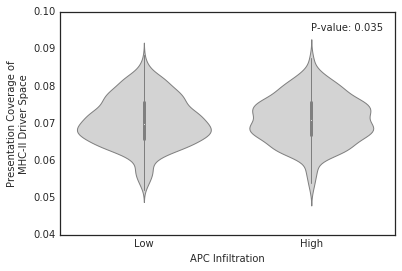

In [108]:
sns.violinplot(x='APC Infiltration', y='Presentation Coverage of\nMHC-II Driver Space', data=plotting,
              color='lightgrey')
plt.text(1, .095, 'P-value: {0}'.format(round(p, 3)))
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/APC_infiltration_by_tissue.coverage.pdf')

In [109]:
# MHC-I - not significant
statistic, p = sp.mannwhitneyu(df.loc[low_exp_patients_by_tissue].classI,
                df.loc[high_exp_patients_by_tissue].classI)

In [110]:
p

0.40800193414388031

In [84]:
df.loc[low_exp_patients_by_tissue].classII.describe()

count    1081.000000
mean        0.070475
std         0.006552
min         0.052063
25%         0.065815
50%         0.069745
75%         0.075639
max         0.088409
Name: classII, dtype: float64

In [83]:
df.loc[high_exp_patients_by_tissue].classII.describe()

count    1082.000000
mean        0.070964
std         0.006430
min         0.051081
25%         0.066798
50%         0.070727
75%         0.075639
max         0.089391
Name: classII, dtype: float64